# "The Exploration of Mexican Migration" 
> "This is a research project exploring migration data and attempting to understand differences within migrants. As well as the disparties migrants suffer as well."

- toc:true
- branch: master
- badges: true
- comments: true
- author: Michael Iniquez and Yahaira Cortez
- categories: [fastpages, jupyter]

# Introduction

Immigration has been a polarizing issue in the United States for  many years and has amplified in the past few years due to positions in government. Mexican migration is not an easy endeavor and many of these migrants are coming to better their lives. The vast majority of migrants are coming for economic opportunity but recent years have made the overall goal of migration convoluted in a manner that sheds them in a bad light. It is vital to understand migration patterns and how they possibly result in policies that aid in migration as well as possibly aiding countries that these migrants are fleeing from.

The data has multiple data books to them that have different types of questions that are asked to migrants. We initially were going to use 4 data books but narrowed our research down to only using 2 data books since our research questions became altered as well. 



> Data Books 
> - HOUSE

    The HOUSE part of the data set refers to household composition, economic and migratory activity of the members in the household. This includes land ownership of migrants, home/real estate, vehicle and livestock ownership, and business ownership and operation. This is pretty important to know to understand what types of migrants are owning land while coming over to the United States.

> - MIG

    The MIG portion of the data set refers to a person-level file containing details of all border crossings (up to 30) by each head of household, as well as measures of economic and social activity during the last U.S. visit.


> Research Questions 
> - We intend to explore the following research questions: 
    1. What demographics such as sex and age are mainly migrating to the United States.
    2. What does life look like for many of these immigrants after migrating and are they able to find better living/working conditions?


We will so conduct text analysis on Trump tweets to understand the narrative that was being built around Mexican migration since 2016. This will set up our analysis in showing migrants are simply trying to better the lives. Our group intends to make bar and line graphs showing migration patterns. Along with colored line graphs possibly showing income brackets before their migration and after. We plan to gather the data and explore the relationship between sex and age as variables in how that has played out in Mexican migration patterns. We also will explore the cost of migration for the years available in the data set. After further exploration of the data, our group aims to examine the  type of amenities migrants are able to use and at which income brackets they use those. 

# Methods

Our Analytical Process: 
    
    Us researchers explored the data by looking at the code books first. This gave us a good explanation of all the variables that was in this dataset and each of the code books. We then actually started to work with the data to see what exaclty the variables were and how we could work them. We narrowed down our research to only the HOUSE and MIG data books as previously mentioned. 

    We wanted to explore the main aspects such as sex, age, and income. Once we got those parts down, we wanted to explore income with these demographics to understand some difference in terms of sex. Each of the data books have income but each are a bit different. The MIG data, we use income of the head of household and compared that to last income recieved in Mexico. Wanted to explore if the money migrants were receiving was better in the U.S. or better in Mexico. The HOUSE data looked at the same thing, head of household income. We had different purposes for these as HOUSE data book had the amenities. We did the samething with wages they made on the first trip to the U.S. to compare it to their last trip. 
    
    We came upon the idea of looking at tweets from Donald Trump and determine what his narrative was on Mexican migration. We used vader sentiment analysis to understand what he was saying was negative or positive. We also looked for the key words that were used a lot in his tweets and which of these were negative as well. We decided to start this part off in our analysis as we think it could help guide our narrative. 

# Results

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import requests
from bs4 import BeautifulSoup
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
from nltk.sentiment import vader
nltk.download('vader_lexicon')

tweets = pd.read_csv('Tweets.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
tweets.describe()

,Date,Time,Tweet,Client,Client Simplified
count,30078,30078,30078,30078,30078
unique,2019,24504,29938,19,4
top,01/05/2015,4:40:19 PM,MAKE AMERICA GREAT AGAIN!,Twitter for Android,Twitter for Android
freq,169,7,11,14197,14197


In [13]:
df = pd.DataFrame(tweets)

#a = df.loc[df['Tweet'] == 'immigrant']
#look at tweets that include words like immigrant, mexican, immigrants, borders, etc. and then look at the most common words 
#within the tweets that contain those words
#get the index of those tweets and then look at the dates they were tweeted

key_words = df.loc[df['Tweet'].str.contains("immigrant|mexican|mexican immigrants|mexicans|immigrants", case=False)]
key_words

,Date,Time,Tweet,Client,Client Simplified
421,10/19/2016,9:34:49 PM,Hillary has called for 550% more Syrian immigr...,Twitter Web Client,Twitter Web Client
832,09/25/2016,8:18:40 PM,Five people killed in Washington State by a Mi...,Twitter for Android,Twitter for Android
1348,08/01/2016,6:54:27 PM,"During the GOP convention, CNN cut away from t...",Twitter for iPhone,Twitter for iPhone
1459,07/27/2016,6:08:35 AM,Crooked Hillary Clinton wants to flood our cou...,Twitter for Android,Twitter for Android
1812,06/24/2016,2:48:50 PM,New Government data by the Center for Immigrat...,Twitter for iPhone,Twitter for iPhone
...,...,...,...,...,...
29491,10/05/2011,12:11:49 PM,@BarackObama sold guns to the Mexican drug car...,TweetDeck,Other
29533,09/27/2011,3:32:23 PM,It seems @BarackObama had our tax dollars buy ...,TweetDeck,Other
29603,09/07/2011,1:37:17 PM,Why was @BarackObama selling guns to Mexican d...,TweetDeck,Other
29612,09/02/2011,2:27:03 PM,Fast and Furious put semi-automatics in the ha...,TweetDeck,Other


In [14]:
key_words

,Date,Time,Tweet,Client,Client Simplified
421,10/19/2016,9:34:49 PM,Hillary has called for 550% more Syrian immigr...,Twitter Web Client,Twitter Web Client
832,09/25/2016,8:18:40 PM,Five people killed in Washington State by a Mi...,Twitter for Android,Twitter for Android
1348,08/01/2016,6:54:27 PM,"During the GOP convention, CNN cut away from t...",Twitter for iPhone,Twitter for iPhone
1459,07/27/2016,6:08:35 AM,Crooked Hillary Clinton wants to flood our cou...,Twitter for Android,Twitter for Android
1812,06/24/2016,2:48:50 PM,New Government data by the Center for Immigrat...,Twitter for iPhone,Twitter for iPhone
...,...,...,...,...,...
29491,10/05/2011,12:11:49 PM,@BarackObama sold guns to the Mexican drug car...,TweetDeck,Other
29533,09/27/2011,3:32:23 PM,It seems @BarackObama had our tax dollars buy ...,TweetDeck,Other
29603,09/07/2011,1:37:17 PM,Why was @BarackObama selling guns to Mexican d...,TweetDeck,Other
29612,09/02/2011,2:27:03 PM,Fast and Furious put semi-automatics in the ha...,TweetDeck,Other


In [15]:
scores = vader.SentimentIntensityAnalyzer()

In [16]:
compound_scores = []

for i in key_words['Tweet']:
    print(scores.polarity_scores(i))
    compound_scores.append(scores.polarity_scores(i)['compound'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.9134}
{'neg': 0.426, 'neu': 0.528, 'pos': 0.046, 'compound': -0.8957}
{'neg': 0.119, 'neu': 0.778, 'pos': 0.103, 'compound': -0.1152}
{'neg': 0.171, 'neu': 0.758, 'pos': 0.071, 'compound': -0.4767}
{'neg': 0.232, 'neu': 0.684, 'pos': 0.084, 'compound': -0.6533}
{'neg': 0.229, 'neu': 0.537, 'pos': 0.234, 'compound': 0.2846}
{'neg': 0.076, 'neu': 0.717, 'pos': 0.207, 'compound': 0.5093}
{'neg': 0.114, 'neu': 0.636, 'pos': 0.25, 'compound': 0.6435}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.317, 'neu': 0.564, 'pos': 0.118, 'compound': -0.7718}
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.865}
{'neg': 0.217, 'neu': 0.677, 'pos': 0.106, 'compound': -0.561}
{'neg': 0.098, 'neu': 0.81, 'pos': 0.092, 'compound': -0.0387}
{'neg': 0.089,

In [17]:
df_scores = pd.DataFrame(compound_scores)
print(df_scores)
print( "Mean: " ,df_scores.mean())

         0
0   0.0000
1  -0.9134
2  -0.8957
3  -0.1152
4  -0.4767
..     ...
93 -0.8074
94 -0.6908
95  0.0000
96 -0.8481
97  0.0000

[98 rows x 1 columns]
Mean:  0   -0.157944
dtype: float64


<AxesSubplot:ylabel='Frequency'>

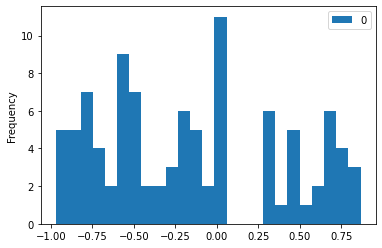

In [18]:
#visualizes the compound scores of tweets that contain the keywords
df_scores.plot(kind='hist', bins = 25)

In [19]:
#test function to help create for loop 
def hiphop():
    j = 0
    for i in music:
        if str(i['artist']['terms']) == 'hip hop':
            #print(str(i['artist']['name'])+ ' is hip hop!')
            j +=1

    print('There are a total of ' + str(j) + ' hip hop artists')

In [20]:
string_tweets = ''''''

In [21]:
for i in key_words['Tweet']:
    string_tweets+=str(i)

In [22]:
#collapse-output
string_tweets

'Hillary has called for 550% more Syrian immigrants, but won’t even mention “radical Islamic terrorists.” #Debate… https://t.co/Rf48XkZWbuFive people killed in Washington State by a Middle Eastern immigrant. Many people died this weekend in Ohio from drug overdoses. N.C. riots!During the GOP convention, CNN cut away from the victims of illegal immigrant violence. They don’t want them heard. https://t.co/EHRiLkQDWDCrooked Hillary Clinton wants to flood our country with Syrian immigrants that we know little or nothing about. The danger is massive. NO!New Government data by the Center for Immigration Studies shows more than 3M new legal & illegal immigrants settled..https://t.co/hMFyZc1kAMThe protesters in New Mexico were thugs who were flying the Mexican flag. The rally inside was big and beautiful, but outside, criminals!Just met with courageous family of Sarah Root in Nebraska. Sarah was horribly killed by illegal immigrant, but leaves behind amazing legacy.Everybody is talking about t

In [23]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
sent = sent_tokenize(string_tweets)
#print(sent)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)

In [25]:
#collapse-output
no_words = ["``", "''","’","//t.co/", "“", "”"]
myStopWords = list(punctuation) + stopwords.words('english')+no_words

wordsNoStop = []
for i in words:
    if i not in myStopWords:
        wordsNoStop.append(i)
#print(words)
print(wordsNoStop)

['Hillary', 'called', '550', 'Syrian', 'immigrants', 'even', 'mention', 'radical', 'Islamic', 'terrorists.', 'Debate…', 'https', '//t.co/Rf48XkZWbuFive', 'people', 'killed', 'Washington', 'State', 'Middle', 'Eastern', 'immigrant', 'Many', 'people', 'died', 'weekend', 'Ohio', 'drug', 'overdoses', 'N.C.', 'riots', 'During', 'GOP', 'convention', 'CNN', 'cut', 'away', 'victims', 'illegal', 'immigrant', 'violence', 'They', 'want', 'heard', 'https', '//t.co/EHRiLkQDWDCrooked', 'Hillary', 'Clinton', 'wants', 'flood', 'country', 'Syrian', 'immigrants', 'know', 'little', 'nothing', 'The', 'danger', 'massive', 'NO', 'New', 'Government', 'data', 'Center', 'Immigration', 'Studies', 'shows', '3M', 'new', 'legal', 'illegal', 'immigrants', 'settled', '..', 'https', '//t.co/hMFyZc1kAMThe', 'protesters', 'New', 'Mexico', 'thugs', 'flying', 'Mexican', 'flag', 'The', 'rally', 'inside', 'big', 'beautiful', 'outside', 'criminals', 'Just', 'met', 'courageous', 'family', 'Sarah', 'Root', 'Nebraska', 'Sarah',

In [26]:
#collapse-output
from nltk.collocations import *
from nltk.probability import FreqDist
freq = FreqDist(wordsNoStop)

for i in sorted(freq, key=freq.get, reverse=True):
    print(i,freq[i])

Mexican 41
immigrants 32
illegal 31
http 19
immigrant 15
border 14
Trump 12
drug 10
's 10
Obama 10
Mexico 9
realDonaldTrump 9
people 8
I 8
U.S. 8
us 7
prison 7
n't 7
country 6
The 6
Are 6
Marine 6
BarackObama 6
https 5
killed 5
criminals 5
America 5
stop 5
We 5
Hillary 4
GOP 4
They 4
want 4
legal 4
Immigrants 4
Bush 4
open 4
Jeb 4
must 4
Via 4
Chapo 4
leaders 4
say 4
many 4
call 4
jail 4
guns 4
Clinton 3
wants 3
know 3
nothing 3
New 3
new 3
beautiful 3
Vets 3
Illegal 3
like 3
free 3
year 3
This 3
build 3
never 3
incompetent 3
one 3
El 3
cartels 3
death 3
lord 3
escaped 3
ca 3
saying 3
coming 3
wall 3
Immigrant 3
– 3
love 3
He 3
real 3
much 3
killing 3
jobs 3
trade 3
Univision 3
YES 3
need 3
government 3
get 3
used 3
Sgt 3
Tahmooressi 3
cont 3
Americans 3
lords 3
called 2
Syrian 2
mention 2
massive 2
NO 2
protesters 2
Sarah 2
leaves 2
amazing 2
talking 2
American 2
flags 2
Do 2
care 2
Donald 2
across 2
record 2
Great 2
borders 2
JebBush 2
MEXICAN 2
ObamaCare 2
So 2
crazy 2
cares 2
How 2

In [27]:
freq

FreqDist({'Mexican': 41, 'immigrants': 32, 'illegal': 31, 'http': 19, 'immigrant': 15, 'border': 14, 'Trump': 12, 'drug': 10, "'s": 10, 'Obama': 10, ...})

In [28]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

stemmed_words = [LancasterStemmer().stem(w) for w in words]

In [29]:
#collapse-output
stemmed_words

['hil',
 'has',
 'cal',
 'for',
 '550',
 '%',
 'mor',
 'syr',
 'immigr',
 ',',
 'but',
 'won',
 '’',
 't',
 'ev',
 'ment',
 '“',
 'rad',
 'islam',
 'terrorists.',
 '”',
 '#',
 'debate…',
 'https',
 ':',
 '//t.co/rf48xkzwbufive',
 'peopl',
 'kil',
 'in',
 'washington',
 'stat',
 'by',
 'a',
 'middl',
 'eastern',
 'immigr',
 '.',
 'many',
 'peopl',
 'died',
 'thi',
 'weekend',
 'in',
 'ohio',
 'from',
 'drug',
 'overdos',
 '.',
 'n.c.',
 'riot',
 '!',
 'dur',
 'the',
 'gop',
 'conv',
 ',',
 'cnn',
 'cut',
 'away',
 'from',
 'the',
 'victim',
 'of',
 'illeg',
 'immigr',
 'viol',
 '.',
 'they',
 'don',
 '’',
 't',
 'want',
 'them',
 'heard',
 '.',
 'https',
 ':',
 '//t.co/ehrilkqdwdcrooked',
 'hil',
 'clinton',
 'want',
 'to',
 'flood',
 'our',
 'country',
 'with',
 'syr',
 'immigr',
 'that',
 'we',
 'know',
 'littl',
 'or',
 'noth',
 'about',
 '.',
 'the',
 'dang',
 'is',
 'mass',
 '.',
 'no',
 '!',
 'new',
 'govern',
 'dat',
 'by',
 'the',
 'cent',
 'for',
 'immigr',
 'study',
 'show',
 

In [30]:
#collapse-output
myStopWords = list(punctuation) + stopwords.words('english')+ no_words

wordsNoStop = []
for i in stemmed_words:
    if i not in myStopWords:
        wordsNoStop.append(i)
#print(words)
print(wordsNoStop)

['hil', 'cal', '550', 'mor', 'syr', 'immigr', 'ev', 'ment', 'rad', 'islam', 'terrorists.', 'debate…', 'https', '//t.co/rf48xkzwbufive', 'peopl', 'kil', 'washington', 'stat', 'middl', 'eastern', 'immigr', 'many', 'peopl', 'died', 'thi', 'weekend', 'ohio', 'drug', 'overdos', 'n.c.', 'riot', 'dur', 'gop', 'conv', 'cnn', 'cut', 'away', 'victim', 'illeg', 'immigr', 'viol', 'want', 'heard', 'https', '//t.co/ehrilkqdwdcrooked', 'hil', 'clinton', 'want', 'flood', 'country', 'syr', 'immigr', 'know', 'littl', 'noth', 'dang', 'mass', 'new', 'govern', 'dat', 'cent', 'immigr', 'study', 'show', 'mor', '3m', 'new', 'leg', 'illeg', 'immigr', 'settl', '..', 'https', '//t.co/hmfyzc1kamthe', 'protest', 'new', 'mexico', 'wer', 'thug', 'wer', 'fly', 'mex', 'flag', 'ral', 'insid', 'big', 'beauty', 'outsid', 'crimin', 'met', 'cour', 'famy', 'sarah', 'root', 'nebrask', 'sarah', 'horr', 'kil', 'illeg', 'immigr', 'leav', 'behind', 'amaz', 'legacy.everybody', 'talk', 'protest', 'burn', 'flag', 'proud', 'wav', 'm

In [31]:
#collapse-output
from nltk.collocations import *
from nltk.probability import FreqDist
freq = FreqDist(wordsNoStop)

for i in sorted(freq, key=freq.get, reverse=True):
    print(i,freq[i])

immigr 57
mex 45
illeg 37
http 19
bord 17
ar 14
us 14
trump 12
wil 12
drug 11
obam 11
realdonaldtrump 10
's 10
peopl 9
kil 9
thi 9
mexico 9
cal 8
mor 8
want 8
com 8
u.s. 8
prison 8
say 8
country 7
leg 7
crimin 7
get 7
n't 7
marin 7
new 6
wer 6
americ 6
vet 6
al 6
ov 6
stop 6
lord 6
lead 6
barackobam 6
https 5
many 5
lov 5
fre 5
via 5
gun 5
becaus 5
hav 5
hil 4
gop 4
govern 4
vot 4
tim 4
car 4
gre 4
bush 4
op 4
giv 4
jeb 4
year 4
must 4
right 4
build 4
wal 4
wher 4
chapo 4
cartel 4
sec 4
mak 4
crim 4
smart 4
nee 4
real 4
much 4
jail 4
releas 4
ment 3
stat 3
cut 3
clinton 3
know 3
noth 3
protest 3
flag 3
beauty 3
talk 3
obamac 3
said 3
across 3
record 3
yo 3
lik 3
speak 3
wom 3
go 3
nev 3
incompet 3
cit 3
amnesty 3
el 3
good 3
dea 3
escap 3
ca 3
negoty 3
– 3
job 3
trad 3
univid 3
friend 3
ye 3
pay 3
allow 3
sgt 3
tahmooress 3
cont 3
syr 2
ev 2
mass 2
fly 2
famy 2
sarah 2
horr 2
leav 2
amaz 2
proud 2
tak 2
donald 2
surg 2
thing 2
jebbush 2
ter 2
tru 2
crazy 2
charg 2
wond 2
undocu 2
read 

In [32]:
freq

FreqDist({'immigr': 57, 'mex': 45, 'illeg': 37, 'http': 19, 'bord': 17, 'ar': 14, 'us': 14, 'trump': 12, 'wil': 12, 'drug': 11, ...})

In [41]:
#collapse-output
sortspeechcount = {k: v for k, v in sorted(freq.items(), key=lambda item: -item[1])}
sortspeechcount

{'immigr': 57,
 'mex': 45,
 'illeg': 37,
 'http': 19,
 'bord': 17,
 'ar': 14,
 'us': 14,
 'trump': 12,
 'wil': 12,
 'drug': 11,
 'obam': 11,
 'realdonaldtrump': 10,
 "'s": 10,
 'peopl': 9,
 'kil': 9,
 'thi': 9,
 'mexico': 9,
 'cal': 8,
 'mor': 8,
 'want': 8,
 'com': 8,
 'u.s.': 8,
 'prison': 8,
 'say': 8,
 'country': 7,
 'leg': 7,
 'crimin': 7,
 'get': 7,
 "n't": 7,
 'marin': 7,
 'new': 6,
 'wer': 6,
 'americ': 6,
 'vet': 6,
 'al': 6,
 'ov': 6,
 'stop': 6,
 'lord': 6,
 'lead': 6,
 'barackobam': 6,
 'https': 5,
 'many': 5,
 'lov': 5,
 'fre': 5,
 'via': 5,
 'gun': 5,
 'becaus': 5,
 'hav': 5,
 'hil': 4,
 'gop': 4,
 'govern': 4,
 'vot': 4,
 'tim': 4,
 'car': 4,
 'gre': 4,
 'bush': 4,
 'op': 4,
 'giv': 4,
 'jeb': 4,
 'year': 4,
 'must': 4,
 'right': 4,
 'build': 4,
 'wal': 4,
 'wher': 4,
 'chapo': 4,
 'cartel': 4,
 'sec': 4,
 'mak': 4,
 'crim': 4,
 'smart': 4,
 'nee': 4,
 'real': 4,
 'much': 4,
 'jail': 4,
 'releas': 4,
 'ment': 3,
 'stat': 3,
 'cut': 3,
 'clinton': 3,
 'know': 3,
 'noth': 

<BarContainer object of 20 artists>

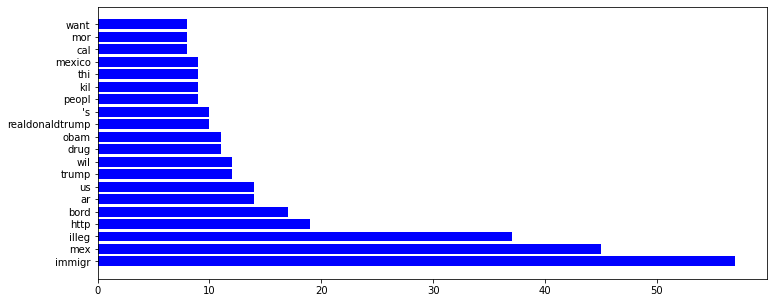

In [42]:
#hide
frequentwords = list(sortspeechcount.keys())[:20]
frequentvals = list(sortspeechcount.values())[:20]

plt.figure(figsize=(12,5))
plt.barh(frequentwords,frequentvals,color='blue')

In [43]:
#collapse-output
barcolors = []
for i in frequentwords:
    # could be:
    # if i == 'i' or i == 'have' or i == 'dream'
    # or could be:
    if i in ['kil','drug','illeg']:
        barcolors.append('red')
    else:
        barcolors.append('grey')
barcolors

['grey',
 'grey',
 'red',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'red',
 'grey',
 'grey',
 'grey',
 'grey',
 'red',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey']

<BarContainer object of 20 artists>

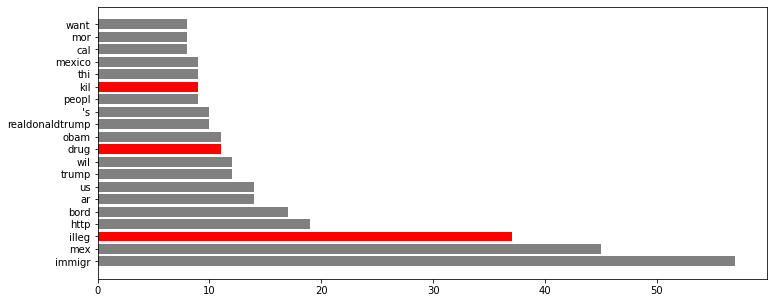

In [44]:
plt.figure(figsize=(12,5))
plt.barh(frequentwords,frequentvals,color=barcolors)

*insert explanation*

In [45]:
mig174_df = pd.read_csv('mig174.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,40,43,49,52,60,61,62,63,64,65,66,340,341,342,343,346,347,349,350,351,352,355,356,359,360,361,362,365,366,369,370,371,372,375,376,379,380,381,382,385,386,389,390,391,392,395,396,399,400,401,402,405,406,409,410,411,412,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,485,486,487,488,491,492,493,494,499,502,503,505,506,507,508,516,517,518,519,520,521,522,523,524,525,526,527,528,530,531,532,552,553,554,555,559,560,561) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
house174_df = pd.read_csv('house174.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (12,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,46,47,50,51,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,84,85,88,89,93,97,101,102,103,104,105,115,116,117,127,128,129,131,132,133,134,137,138,140,141,142,143,146,147,150,151,152,153,156,157,160,161,162,163,166,167,170,171,172,173,176,177,180,181,182,183,186,187,190,191,192,193,196,197,200,201,202,203,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,276,277,278,279,284,288,289,292,296,297,300,304,305,308,312,313,316,321,322,325,330,331,334,339,340,343,348,349,356,357,365,366,374,375,383,384,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,410,411,413,416,417,418,419,42

In [47]:
HOUSE174_df = house174_df[house174_df != 9999]
MIG174_df = mig174_df[mig174_df.age != 9999]

count    9049.000000
mean       46.511769
std        14.937821
min        17.000000
25%        35.000000
50%        44.000000
75%        57.000000
max        98.000000
Name: age, dtype: float64

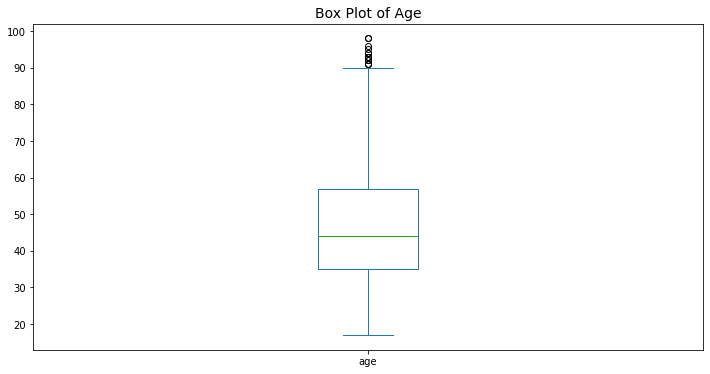

In [48]:
ax = MIG174_df["age"].plot(kind="box",figsize=(12,6))
ax.set_title('Box Plot of Age', fontsize = 14)
#ax.set_ylabel('age')
MIG174_df["age"].describe()

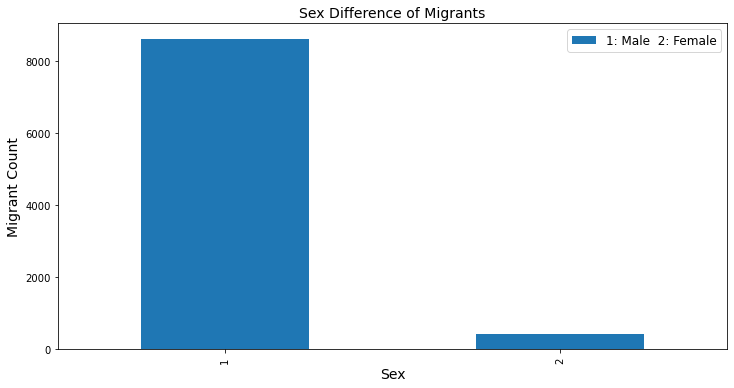

In [49]:
a = MIG174_df.groupby('sex')['country'].count().plot(kind='bar',figsize=(12,6))
a.set_title('Sex Difference of Migrants',fontsize=14)
a.set_xlabel('Sex',fontsize=14)
a.set_ylabel('Migrant Count',fontsize=14)
plt.legend(['1: Male  2: Female'],fontsize=12)

*This bar graph is showing the sex difference on those that are migrating. Males are the ones mostly migrating and there has been research to explain why this is so.* 

In [50]:
HOUSE174_df = house174_df[house174_df != 9999]

In [51]:
MIG174_df.loc[MIG174_df['ldowage'] == ' ','ldowage'] = '0'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [52]:
MIG174_df.loc[MIG174_df['ldowage'] == ' ','ldowage']

Series([], Name: ldowage, dtype: object)

In [53]:
MIG174_df[['ldowage']] = MIG174_df[['ldowage']].astype(float)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Text(0, 0.5, 'Immigrant Count')

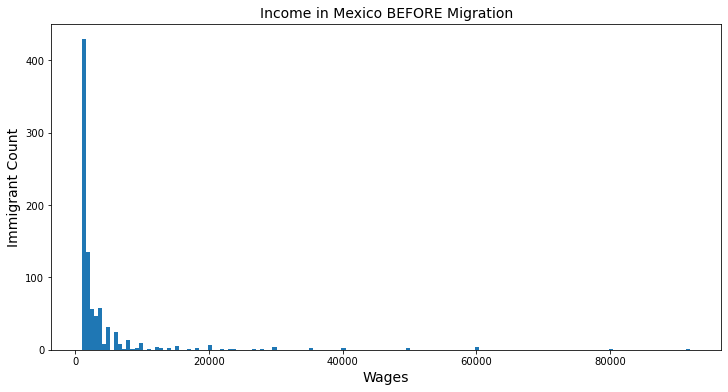

In [54]:
df3 = MIG174_df.loc[(MIG174_df['ldowage'] <100000) & (MIG174_df['ldowage']>=1000) & (MIG174_df['ldowage'] != 9999), 'ldowage']
a = df3.plot(kind='hist',bins=150,figsize=(12,6))
a.set_title('Income in Mexico BEFORE Migration',fontsize=14)
a.set_xlabel('Wages',fontsize=14)
a.set_ylabel('Immigrant Count',fontsize=14)

In [55]:
MIG174_df.loc[MIG174_df['hhincome'] == ' ','hhincome'] = '0'

In [56]:
MIG174_df.loc[MIG174_df['hhincome'] == ' ','hhincome']

Series([], Name: hhincome, dtype: object)

In [72]:
MIG174_df[['hhincome']] = MIG174_df[['hhincome']].astype(float)
#making the income variable a float to be able to work with it

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Text(0, 0.5, 'Immigrant Count')

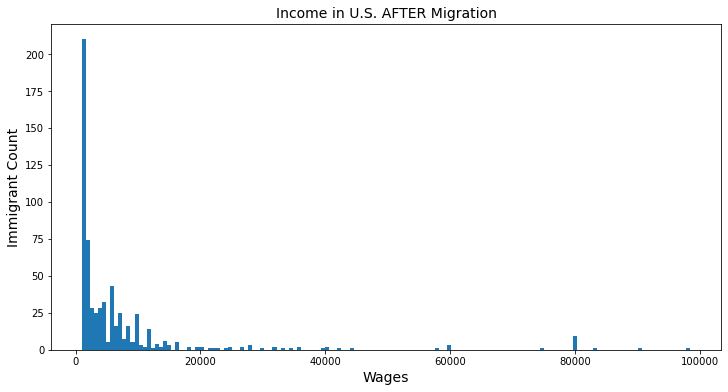

In [58]:
df4 = MIG174_df.loc[(MIG174_df['hhincome'] <100000) & (MIG174_df['hhincome']>=1000) & (MIG174_df['hhincome'] != 9999), 'hhincome']
a = df4.plot(kind='hist',bins=150,figsize=(12,6))
a.set_title('Income in U.S. AFTER Migration',fontsize=14)
a.set_xlabel('Wages',fontsize=14)
a.set_ylabel('Immigrant Count',fontsize=14)

In [73]:
MIG174_df.loc[MIG174_df['age']<=19, 'age_group'] = '0-19'
MIG174_df.loc[MIG174_df['age'].between(20,29), 'age_group'] = '20-29'
MIG174_df.loc[MIG174_df['age'].between(30,39), 'age_group'] = '30-39'
MIG174_df.loc[MIG174_df['age'].between(40,49), 'age_group'] = '40-49'
MIG174_df.loc[MIG174_df['age'].between(50,59), 'age_group'] = '50-59'
MIG174_df.loc[MIG174_df['age'].between(60,69), 'age_group'] = '60-69'
MIG174_df.loc[MIG174_df['age'].between(70,79), 'age_group'] = '70-79'
MIG174_df.loc[MIG174_df['age'].between(80,89), 'age_group'] = '80-89'
MIG174_df.loc[MIG174_df['age'].between(90,99), 'age_group'] = '90-99'
#creating age groups by decades

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0, 0.5, 'Immigrant Count')

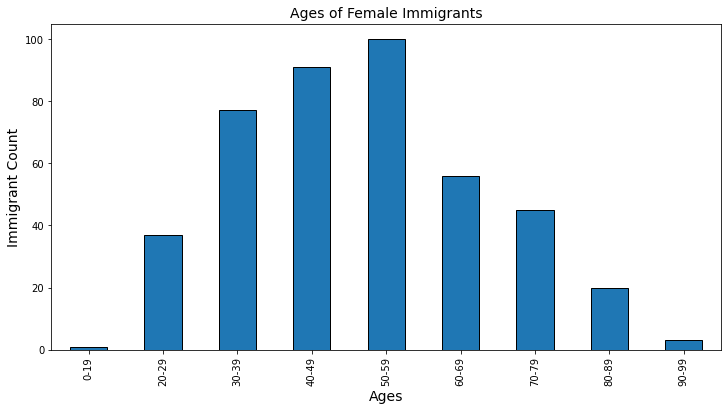

In [60]:
ax = MIG174_df.loc[MIG174_df['sex'] == 2].groupby('age_group')['sex'].count().plot(kind='bar', edgecolor = 'black', figsize=(12,6))
ax.set_title('Ages of Female Immigrants',fontsize=14)
ax.set_xlabel('Ages',fontsize=14)
ax.set_ylabel('Immigrant Count',fontsize=14)

Text(0, 0.5, 'Immigrant Count')

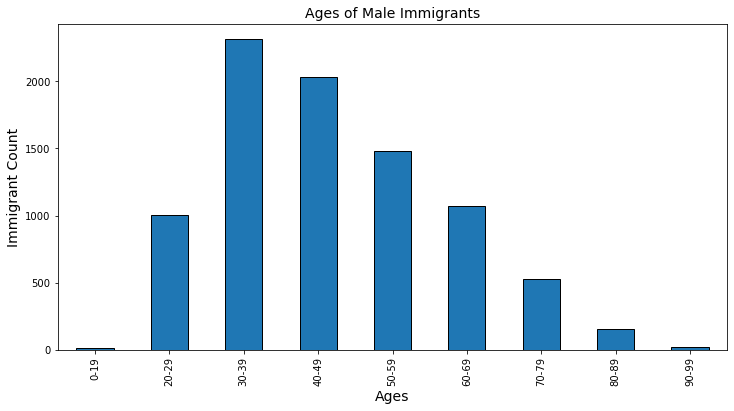

In [61]:
ax = MIG174_df.loc[MIG174_df['sex'] == 1].groupby('age_group')['sex'].count().plot(kind='bar', edgecolor = 'black', figsize=(12,6))
ax.set_title('Ages of Male Immigrants',fontsize=14)
ax.set_xlabel('Ages',fontsize=14)
ax.set_ylabel('Immigrant Count',fontsize=14)

In [62]:
MIG174_df.loc[MIG174_df['hhincome']<=10000, 'income_group'] = '0-10000'
MIG174_df.loc[MIG174_df['hhincome'].between(10000,19999), 'income_group'] = '10000-19999'
MIG174_df.loc[MIG174_df['hhincome'].between(20000,29999),'income_group'] = '20000-29999'
MIG174_df.loc[MIG174_df['hhincome'].between(30000,39999), 'income_group'] = '30000-39999'
MIG174_df.loc[MIG174_df['hhincome'].between(40000,49999), 'income_group'] = '40000-49999'
MIG174_df.loc[MIG174_df['hhincome'].between(50000,59999), 'income_group'] = '50000-59999'
MIG174_df.loc[MIG174_df['hhincome'].between(60000,69999), 'income_group'] = '60000-69999'
MIG174_df.loc[MIG174_df['hhincome'].between(70000,79999), 'income_group'] = '70000-79999'
MIG174_df.loc[MIG174_df['hhincome'].between(80000,89999), 'income_group'] = '80000-89999'
MIG174_df.loc[MIG174_df['hhincome'].between(90000,100000), 'income_group'] = '90000-100000'

Text(0.5, 0, 'Immigrant Count')

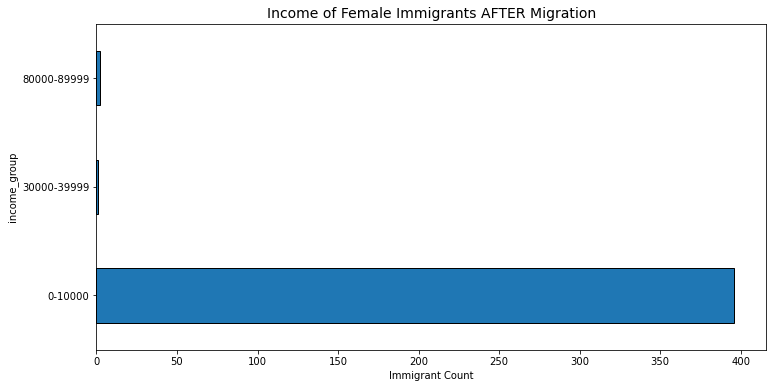

In [63]:
cx = MIG174_df.loc[MIG174_df['sex'] == 2].groupby('income_group')['sex'].count().plot(kind='barh', edgecolor = 'black', figsize=(12,6))
cx.set_title('Income of Female Immigrants AFTER Migration',fontsize=14)
cx.set_xlabel('Immigrant Count',fontsize=10)
#cx.set_ylabel('Immigrant Count',fontsize=14)

Text(0.5, 0, 'Immigrant Count')

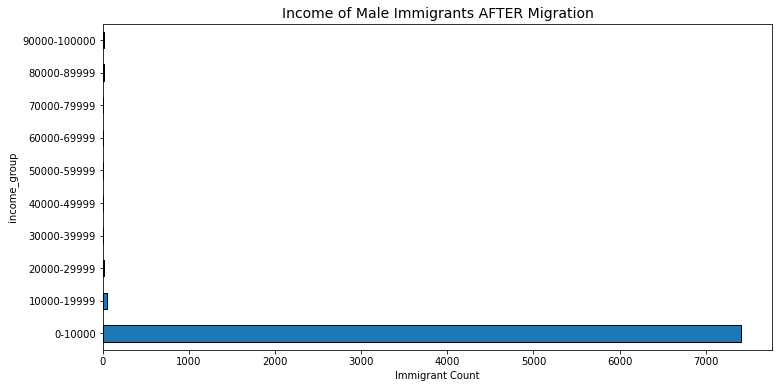

In [64]:
ax = MIG174_df.loc[MIG174_df['sex'] == 1].groupby('income_group')['sex'].count().plot(kind='barh', edgecolor = 'black', figsize=(12,6))
ax.set_title('Income of Male Immigrants AFTER Migration',fontsize=14)
ax.set_xlabel('Immigrant Count',fontsize=10)
#ax.set_ylabel('Immigrant Count',fontsize=14)

In [65]:
MIG174_df['income_diff'] = MIG174_df['hhincome'] - MIG174_df['ldowage']

/tmp/ipykernel_2105/597311161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MIG174_df['income_diff'] = MIG174_df['hhincome'] - MIG174_df['ldowage']


In [66]:
df5 = MIG174_df.loc[(MIG174_df['income_diff'] <50000) & (MIG174_df['income_diff']>=-25000) & (MIG174_df['income_diff'] != 9999) & (MIG174_df['income_diff'] != -9999), 'income_diff']

Mean:  129.51943800133677
Median:  -100.0


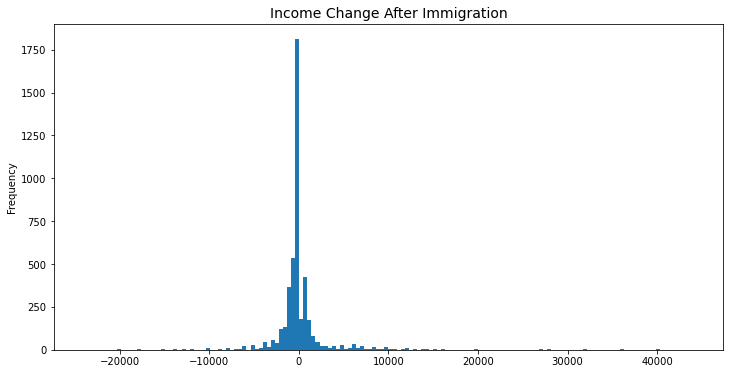

In [67]:
dx = df5.plot(kind='hist',figsize=(12,6),bins=150)
dx.set_title('Income Change After Immigration',fontsize=14)
print('Mean: ',MIG174_df.loc[(MIG174_df['income_diff'] <50000) & (MIG174_df['income_diff']>=-25000) & (MIG174_df['income_diff'] != 9999) & (MIG174_df['income_diff'] != -9999), 'income_diff'].mean())
print('Median: ',MIG174_df.loc[(MIG174_df['income_diff'] <50000) & (MIG174_df['income_diff']>=-25000) & (MIG174_df['income_diff'] != 9999) & (MIG174_df['income_diff'] != -9999), 'income_diff'].median())
#print('Mode: ',MIG174_df.loc[(MIG174_df['income_diff'] < 50000) & (MIG174_df['income_diff']>=-25000) & (MIG174_df['income_diff'] != 9999) & (MIG174_df['income_diff'] != -9999), 'income_diff'].mode())

In [68]:
MIG174_df.loc[MIG174_df['uswage1']<=100, 'wage_group'] = '0-100'
MIG174_df.loc[MIG174_df['uswage1'].between(101,499), 'wage_group'] = '101-499'
MIG174_df.loc[MIG174_df['uswage1'].between(500,999), 'wage_group'] = '500-999'
MIG174_df.loc[MIG174_df['uswage1'].between(1000,1999), 'wage_group'] = '1000-1999'
MIG174_df.loc[MIG174_df['uswage1'].between(2000,2999),'wage_group'] = '2000-2999'
MIG174_df.loc[MIG174_df['uswage1'].between(3000,3999), 'wage_group'] = '3000-3999'
MIG174_df.loc[MIG174_df['uswage1'].between(4000,4999), 'wage_group'] = '4000-4999'
MIG174_df.loc[MIG174_df['uswage1'].between(5000,5999), 'wage_group'] = '5000-5999'
MIG174_df.loc[MIG174_df['uswage1'].between(6000,6999), 'wage_group'] = '6000-6999'
MIG174_df.loc[MIG174_df['uswage1'].between(7000,7999), 'wage_group'] = '7000-7999'
MIG174_df.loc[MIG174_df['uswage1'].between(8000,8999), 'wage_group'] = '8000-8999'
MIG174_df.loc[MIG174_df['uswage1'].between(9000,9999), 'wage_group'] = '9000-9999'
MIG174_df.loc[MIG174_df['uswage1'].between(10000,19999), 'wage_group'] = '10000-19999'
MIG174_df.loc[MIG174_df['uswage1'].between(20000,29999), 'wage_group'] = '20000-29999'
MIG174_df.loc[MIG174_df['uswage1'].between(30000,39999), 'wage_group'] = '30000-39999'
MIG174_df.loc[MIG174_df['uswage1'].between(40000,49999), 'wage_group'] = '40000-49999'
MIG174_df.loc[MIG174_df['uswage1'].between(50000,59999), 'wage_group'] = '50000-59999'
MIG174_df.loc[MIG174_df['uswage1'].between(60000,69999), 'wage_group'] = '60000-69999'
MIG174_df.loc[MIG174_df['uswage1'].between(70000,79999), 'wage_group'] = '70000-79999'
MIG174_df.loc[MIG174_df['uswage1'].between(80000,89999), 'wage_group'] = '80000-89999'
MIG174_df.loc[MIG174_df['uswage1'].between(90000,100000), 'wage_group'] = '90000-100000'

In [69]:
wage_df = [MIG174_df['uswage1'], MIG174_df['uswagel'], MIG174_df['wage_group']]
headers = ['uswage1', 'uswagel','wage_group']
Wage_df = pd.concat(wage_df,axis = 1, keys= headers)
print(Wage_df)

      uswage1  uswagel wage_group
0      9999.0  9999.00  9000-9999
1         0.3     0.37      0-100
2         1.0     1.00      0-100
3         3.0     3.00      0-100
4      9999.0  9999.00  9000-9999
...       ...      ...        ...
9047      3.0     3.00      0-100
9048     70.0    70.00      0-100
9049     26.0    50.00      0-100
9050      8.0  9999.00      0-100
9051   9999.0     7.00  9000-9999

[9049 rows x 3 columns]


In [70]:
Wage_df.loc[(Wage_df['uswagel'] != 9999) & (Wage_df['uswagel'] != 8888) & (Wage_df['uswage1'] != 9999) & (Wage_df['uswage1'] != 8888), ['uswage1','uswagel','wage_group']]

,uswage1,uswagel,wage_group
1,0.30,0.37,0-100
2,1.00,1.00,0-100
3,3.00,3.00,0-100
6,2.25,6.00,0-100
7,0.80,2.50,0-100
...,...,...,...
9038,1.50,1.50,0-100
9043,50.00,80.00,0-100
9047,3.00,3.00,0-100
9048,70.00,70.00,0-100


(0.0, 10000.0)

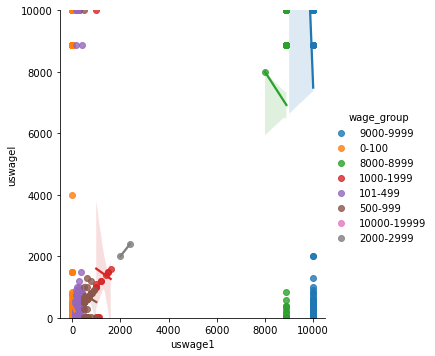

In [74]:
sns.lmplot(data=Wage_df, x="uswage1", y="uswagel",
           hue="wage_group");
plt.ylim(0,10000)
#creating a graph to represent the wage differences between their first U.S. trip and their last U.S. trip.